## IMPORT **LIBRARIES**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


# **LOAD DATA**

In [3]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

Saving water_filter_shop_sales_Data_2025.csv to water_filter_shop_sales_Data_2025.csv


# **BASIC DATA CHECK**

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Invoice_ID     3459 non-null   object
 1   month          3459 non-null   object
 2   Product_Type   3459 non-null   object
 3   Quantity       3459 non-null   int64 
 4   Unit_Price     3459 non-null   int64 
 5   Total_Sale     3459 non-null   int64 
 6   Customer_Type  3459 non-null   object
 7   Location       3459 non-null   object
 8   Payment_Mode   3459 non-null   object
 9   Service_Type   3459 non-null   object
dtypes: int64(3), object(7)
memory usage: 270.4+ KB


,0
Invoice_ID,0
month,0
Product_Type,0
Quantity,0
Unit_Price,0
Total_Sale,0
Customer_Type,0
Location,0
Payment_Mode,0
Service_Type,0


In [5]:
df.head()

,Invoice_ID,month,Product_Type,Quantity,Unit_Price,Total_Sale,Customer_Type,Location,Payment_Mode,Service_Type
0,INV00001,January,Accessories,4,1060,4240,Institution,Suburbs,Cash,New Purchase
1,INV00004,January,Accessories,2,666,1332,Business,Suburbs,Card,New Purchase
2,INV00006,January,Accessories,3,287,861,Business,Suburbs,Online,New Purchase
3,INV00035,January,Accessories,3,234,702,Institution,Suburbs,Cash,New Purchase
4,INV00036,January,Accessories,2,1304,2608,Institution,Downtown,Cash,New Purchase


In [6]:
df.tail()

,Invoice_ID,month,Product_Type,Quantity,Unit_Price,Total_Sale,Customer_Type,Location,Payment_Mode,Service_Type
3454,INV03723,December,Water Purifier,2,40532,81064,Business,Downtown,Cash,New Purchase
3455,INV03724,December,Maintenance,1,5000,5000,Business,Downtown,Online,New Purchase
3456,INV03725,December,Accessories,4,5000,20000,Institution,City Center,Card,Maintenance
3457,INV03726,December,Water Purifier,4,5000,20000,Institution,Industrial Area,Online,Maintenance
3458,INV03727,December,Maintenance,1,12631,12631,Business,Downtown,Card,New Purchase


# **FEATURE ENGINEERING**
Convert months to numeric(for seasonality & forecasting)

In [7]:
month_map = {
    'January':1, 'February':2, 'March':3, 'April':4,
    'May':5, 'June':6, 'July':7, 'August':8,
    'September':9, 'October':10, 'November':11, 'December':12
}

df['Month_Num'] = df['month'].map(month_map)


# **PRESENT SALES TREND (TIME & SEASONALITY)**
monthly sales trend

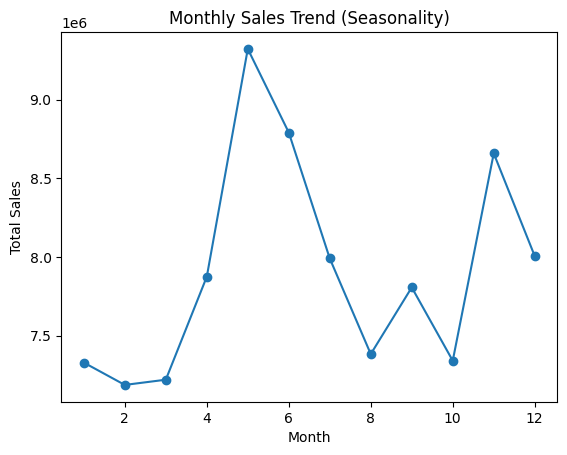

In [8]:
monthly_sales = df.groupby('Month_Num')['Total_Sale'].sum().reset_index()

plt.figure()
plt.plot(monthly_sales['Month_Num'], monthly_sales['Total_Sale'], marker='o')
plt.title("Monthly Sales Trend (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


**Sales by product type**

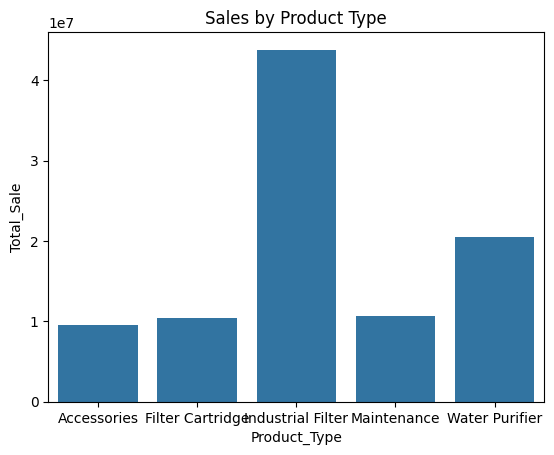

In [9]:
product_sales = df.groupby('Product_Type')['Total_Sale'].sum().reset_index()

plt.figure()
sns.barplot(x='Product_Type', y='Total_Sale', data=product_sales)
plt.title("Sales by Product Type")
plt.show()


**sales by customer category**

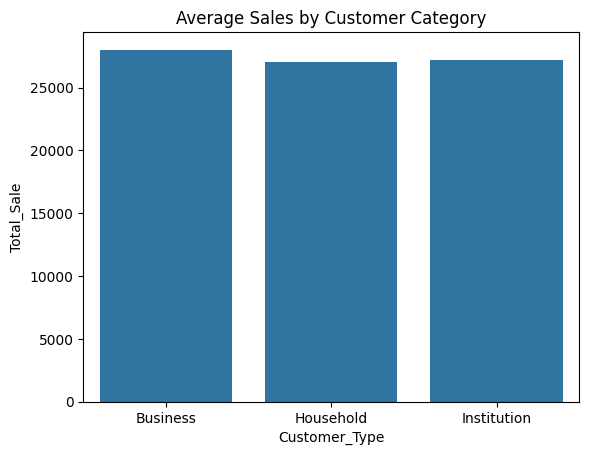

In [10]:
customer_sales = df.groupby('Customer_Type')['Total_Sale'].mean().reset_index()

plt.figure()
sns.barplot(x='Customer_Type', y='Total_Sale', data=customer_sales)
plt.title("Average Sales by Customer Category")
plt.show()


**sales by location**

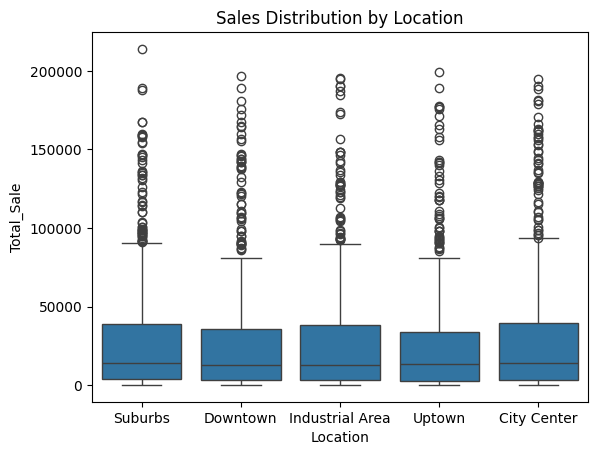

In [11]:
plt.figure()
sns.boxplot(x='Location', y='Total_Sale', data=df)
plt.title("Sales Distribution by Location")
plt.show()


**sales by service type**

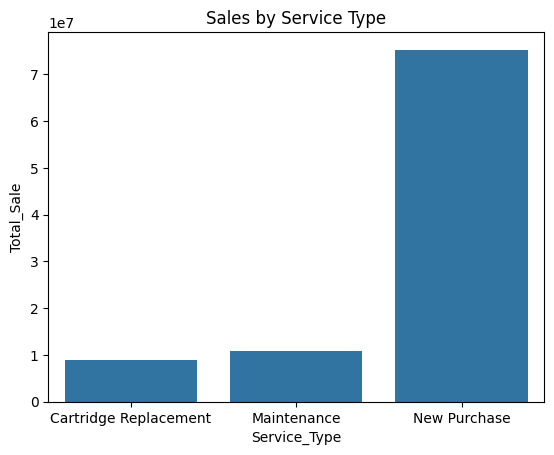

In [12]:
service_sales = df.groupby('Service_Type')['Total_Sale'].sum().reset_index()

plt.figure()
sns.barplot(x='Service_Type', y='Total_Sale', data=service_sales)
plt.title("Sales by Service Type")
plt.show()


# **CORERELATION ANALYSIS**

In [13]:
df_corr = df.copy()

df_corr = pd.get_dummies(df_corr, drop_first=True)


In [14]:
corr_matrix = df_corr.corr()
corr_matrix['Total_Sale'].sort_values(ascending=False).head(10)


,Total_Sale
Total_Sale,1.000000
Unit_Price,0.827515
Product_Type_Industrial Filter,0.503087
Quantity,0.449312
Service_Type_New Purchase,0.295563
Invoice_ID_INV03252,0.088337
Invoice_ID_INV01052,0.081509
Invoice_ID_INV00293,0.080264
Invoice_ID_INV01721,0.079726
Invoice_ID_INV01473,0.079203


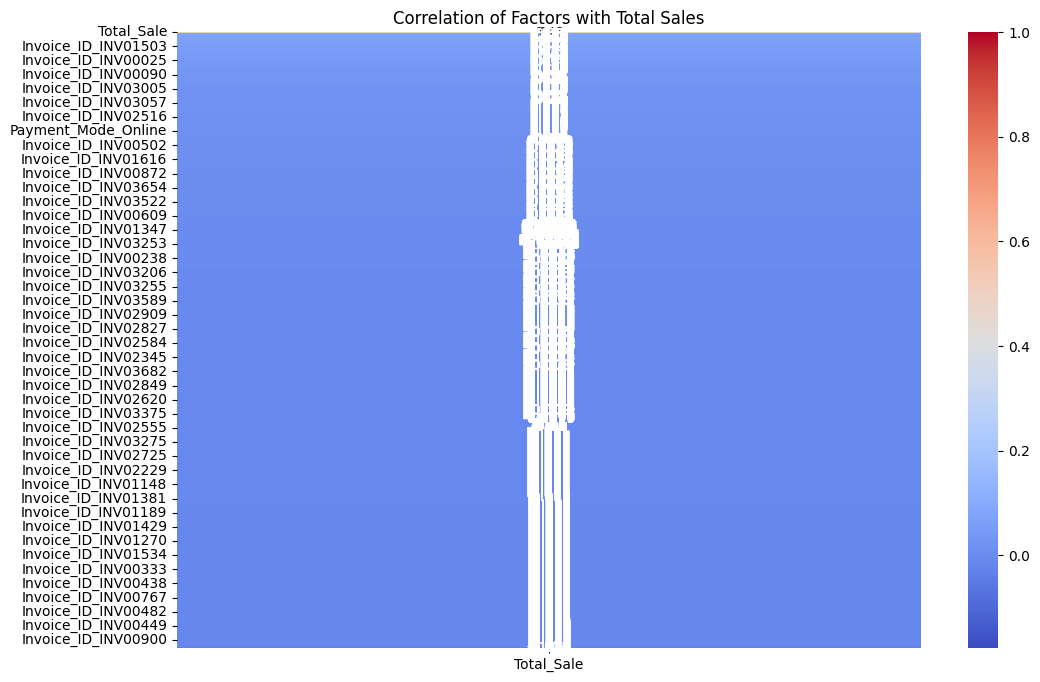

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix[['Total_Sale']].sort_values(by='Total_Sale', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation of Factors with Total Sales")
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df_corr.drop('Total_Sale', axis=1)

# Ensure all columns are numeric (float) for VIF calculation
# Boolean columns (like Invoice_ID_...) will be converted to 0.0/1.0
X_vif = X_vif.astype(float)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(len(X_vif.columns))
]

vif_data.sort_values(by="VIF", ascending=False).head(10)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

**HOW THESE FACTORS AFFECT FUTURE SALES (KEY LINK)**



“The identified factors—seasonality, product type, customer category, service type, and location—are combined as features in regression-based predictive models. This enables the model to learn how each factor contributes to future sales levels.”


# **CLUSTTERING TO DISCOVER SALES PATTERNS**

In [16]:
cluster_data = df[['Quantity', 'Total_Sale']]


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Sales_Cluster'] = kmeans.fit_predict(cluster_data)


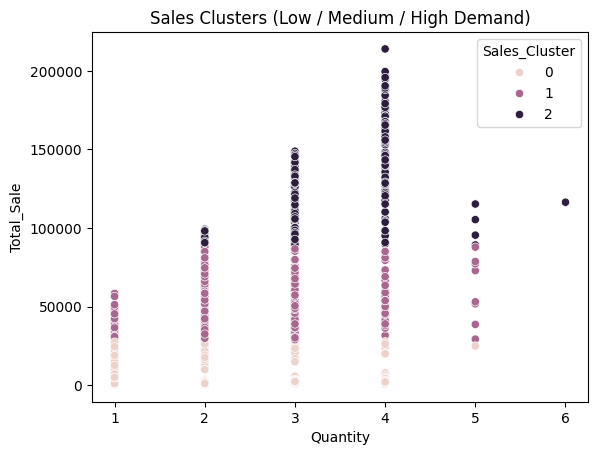

In [18]:
plt.figure()
sns.scatterplot(
    x='Quantity',
    y='Total_Sale',
    hue='Sales_Cluster',
    data=df
)
plt.title("Sales Clusters (Low / Medium / High Demand)")
plt.show()


“Clustering reveals distinct sales behaviour patterns, enabling demand segmentation for improved forecasting and inventory management.”

**HOW CLUSTERING SUPPORTS FUTURE PREDICTION**
“The discovered sales clusters provide additional insight into recurring demand patterns, which complements regression and forecasting models by improving prediction accuracy.”

# **FEATURE IMPORTANCE**
This shows which factor matter most
"“Correlation analysis was conducted to identify the most influential features affecting sales performance, guiding feature selection for predictive modelling.”

In [19]:
# encode categorical variables
df_model = df.copy()
df_model = pd.get_dummies(df_model, drop_first=True)


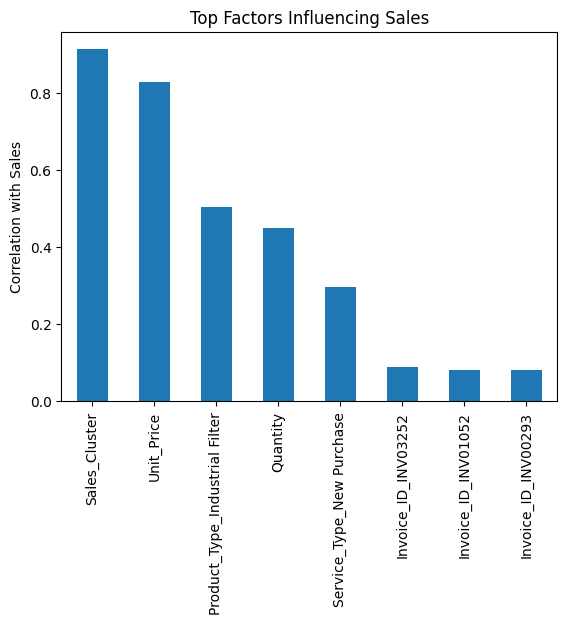

In [20]:
# plot top influencing factors
corr = df_model.corr(numeric_only=True)['Total_Sale'].sort_values(ascending=False)
corr_top = corr.drop('Total_Sale').head(8)

plt.figure()
corr_top.plot(kind='bar')
plt.title("Top Factors Influencing Sales")
plt.ylabel("Correlation with Sales")
plt.show()

**BASELINE REGRESSION MODEL**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_model.drop('Total_Sale', axis=1)
y = df_model['Total_Sale']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [23]:
y_pred = lr.predict(X_test)


“A baseline linear regression model was developed to validate the feasibility of sales prediction using the engineered features.”

**TIME SERIES**
monthly series

In [24]:
monthly_ts = df.groupby('Month_Num')['Total_Sale'].sum()


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_ts, model='additive', period=12)
decomposition.plot()
plt.show()


ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)